A


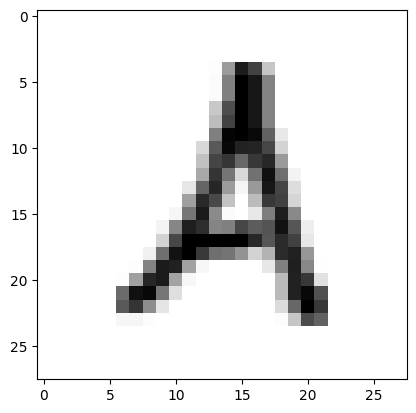

In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import os

data = pd.read_csv('A_Z Handwritten Data.csv')

data.head()

label = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',
         6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',
         12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',
         18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

data.iloc[:,0] = data.iloc[:,0].map(label)



x = data.drop(data.columns[0],axis=1) # Droping the label column
y = data.iloc[:,0].copy() # Copying the label column

x = np.array(x) # Values
y = np.array(y) # Labels

sample_data = x[10]
sample_image = sample_data.reshape(28,28)
plt.imshow(sample_image,cmap=matplotlib.cm.binary,interpolation="nearest")

print(y[10])